In [114]:
# Preliminary imports
import os
import pandas as pd
from pathlib import Path
import numpy as np
os.environ['OPM_NUM_THREADS'] = '1'

In [115]:
# Read column names from file and drop MYOPIC.
file_path = Path("./Resources/myopia.csv")
cols = list(pd.read_csv(file_path, nrows=1))
# print(cols)
myopia_df = pd.read_csv(file_path, usecols=[i for i in cols if i != 'MYOPIC'])
myopia_df.head(10)
mcols = list(myopia_df.columns)
print(mcols)


['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR', 'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY']


In [118]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(myopia_df[['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', \
    'READHR', 'COMPHR', 'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY']])

# print(scaled_data)

In [117]:
# Are the shapes aligned?
print(myopia_df.shape)
print(scaled_data.shape)
myopia_df.reset_index(drop=True, inplace=True)
#myopia_df

tsf_myopia_df = pd.DataFrame(scaled_data, columns=myopia_df.columns[0:])
tsf_myopia_df.to_csv('./Resources/transformed_myopia.csv', index=False)


(618, 14)
(618, 14)


In [107]:
# Time for clusters!
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
file = Path('./Resources/transformed_myopia.csv')
tsf_myopia = pd.read_csv(file)
tsf_myopia.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138,1.003241
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138,1.003241
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,-1.013030,-0.996769
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,-1.013030,1.003241
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,-0.996769


In [119]:
# Plot the clusters using an elbow curve
inertia = []
k = list(range(1, 14))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tsf_myopia)
    inertia.append(km.inertia_)

elbow_data = {'k': k, 'inertia':inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow


c:\Users\cbatl\Anaconda3\envs\-Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,8652.000000
1,2,7497.115123
2,3,6732.095466
3,4,6362.286058
4,5,6083.180361
5,6,5817.591226
6,7,5634.336407
7,8,5434.664962
8,9,5295.164517
9,10,5118.628831


In [126]:
# What is the % change in clusters?
df_elbow['inertia'].pct_change()

0          NaN
1    -0.133482
2    -0.102042
3    -0.054932
4    -0.043869
5    -0.043660
6    -0.031500
7    -0.035438
8    -0.025669
9    -0.033339
10   -0.026093
11   -0.031566
12   -0.015744
Name: inertia, dtype: float64

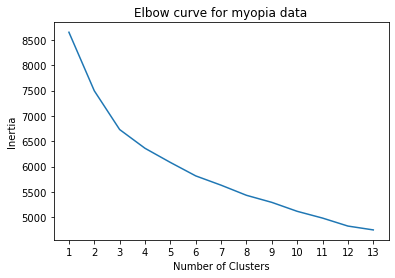

In [109]:
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,14))
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for myopia data')
plt.show()

# I beleive the optimal number of clusters = 4

#### I believe the optimal number of clusters is 4

#### PCA Analysis -- Can we get accurate results with fewer dimensions?